In [294]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The task from today's lab will be to predict whether passengers from the Titanic survided based on their age, gender and other information. Now you should be more familiar with the different steps of training a machine learning model, so this lab will be less guided than previous ones. Do not hesitate to ask questions if you have doubts (asking questions will never be penalized).

The data is from https://www.kaggle.com/c/titanic. You can find more information on each feature there.

The data is already split into train and test sets. We can use the pandas library to load the csv file(s).

In [295]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('titanic/train.csv')

In [296]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

We will just use information on ticket class, ticket fare, passenger gender, passenger age, number of siblings on board and the port of embarcation, although more information could be extracted from other columns (for instance "Sir" in the name may be an indicator of nobility and may have predictive value).

**Perform some explanatory data analysis. Information of interest may consist in the percentage of passengers who survived, the distribution of age among survivors and victims...**

Visual charts are more than welcome.

In [297]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<function matplotlib.pyplot.show(close=None, block=None)>

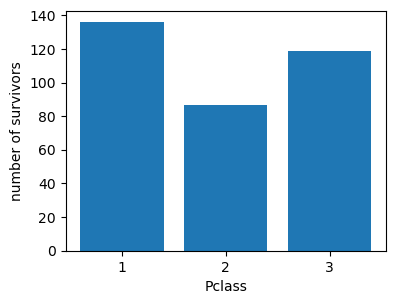

In [298]:
pc1 = df.loc[df['Pclass'] == 1, 'Survived'].sum()
pc2 = df.loc[df['Pclass'] == 2, 'Survived'].sum()
pc3 = df.loc[df['Pclass'] == 3, 'Survived'].sum()
pcresults = [pc1,pc2,pc3]
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
Pclass = ['1','2','3']
ax.bar(Pclass,pcresults)
plt.xlabel('Pclass')
plt.ylabel('number of survivors')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

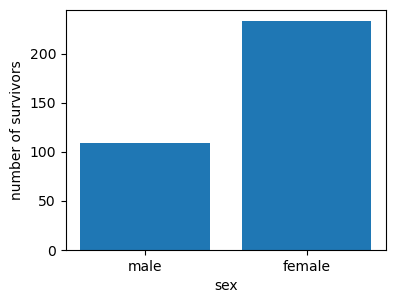

In [299]:
smale = df.loc[df['Sex'] == 'male', 'Survived'].sum()
sfemale = df.loc[df['Sex'] == 'female', 'Survived'].sum()
sresults = [smale,sfemale]
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
sex = ['male','female']
ax.bar(sex,sresults)
plt.xlabel('sex')
plt.ylabel('number of survivors')
plt.show

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

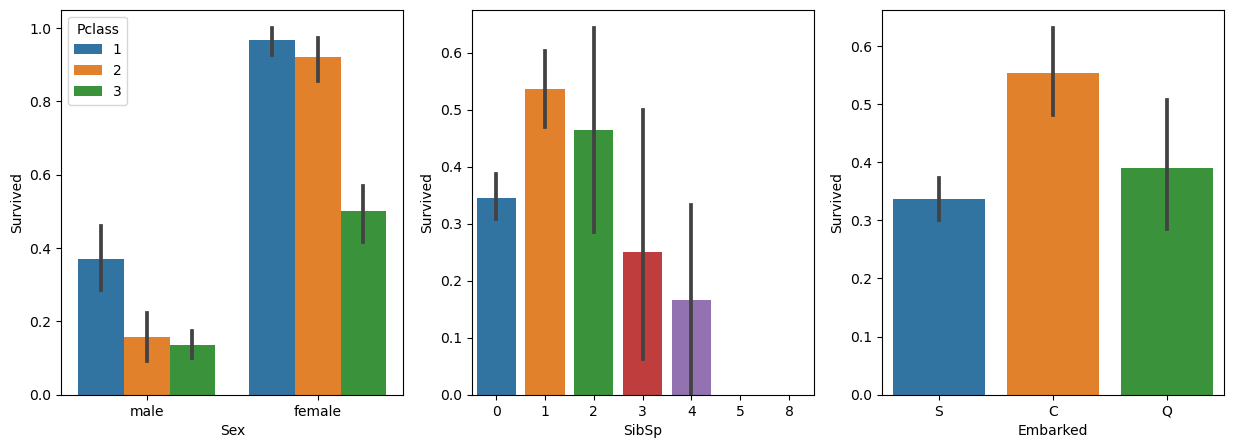

In [300]:
#using seaborn to visualise data

fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(ax=axes[0],data=df, x='Sex', y='Survived', hue='Pclass')
sns.barplot(ax=axes[1],data=df, x='SibSp', y='Survived')
sns.barplot(ax=axes[2],data=df, x='Embarked', y='Survived')


<AxesSubplot:>

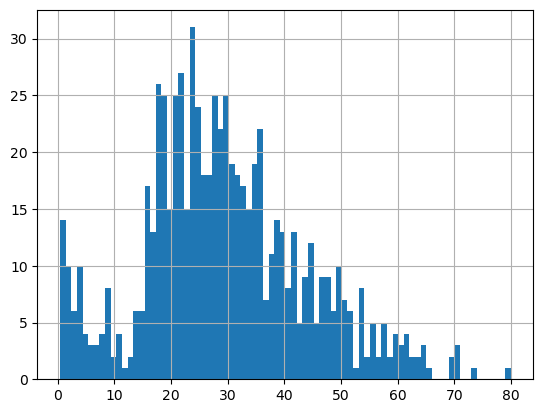

In [301]:
df.Age.hist(bins=80)

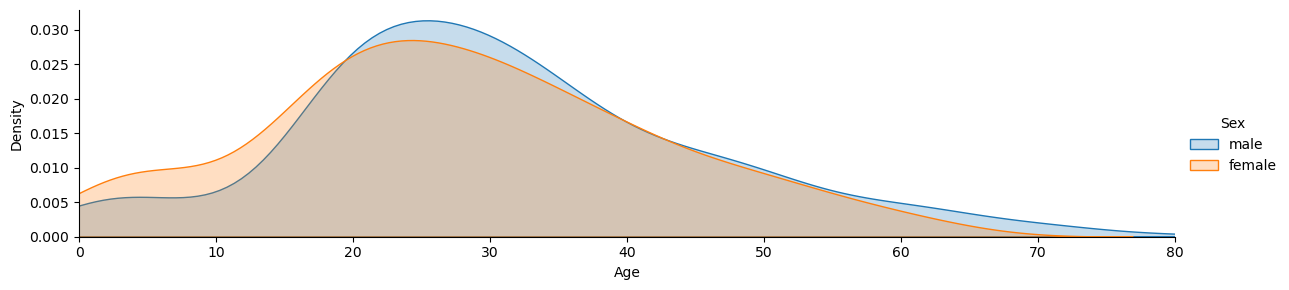

In [302]:
fig = sns.FacetGrid(df, hue="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

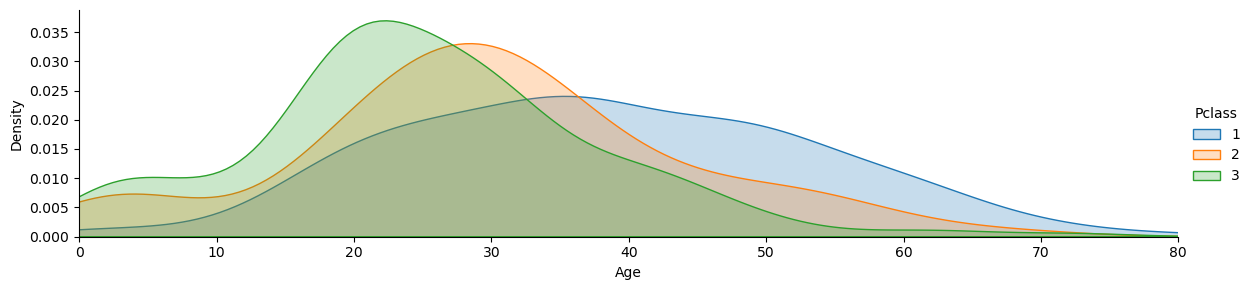

In [303]:
fig = sns.FacetGrid(df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/Users/leopoldstevens/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


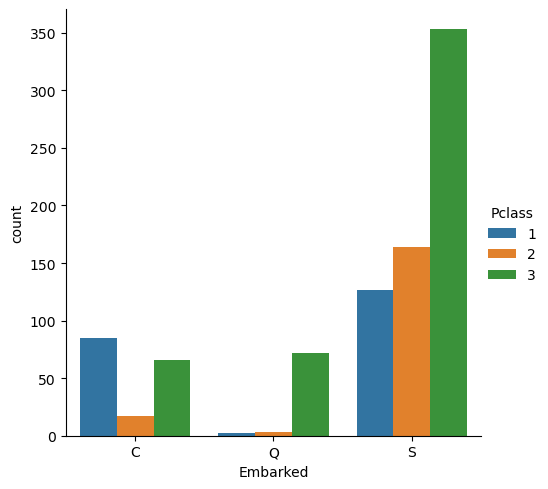

In [304]:
sns.catplot('Embarked', data=df, hue='Pclass', kind='count', order=['C', 'Q', 'S'])

**Transform the pandas dataframe into a numpy array suitable to train machine learning models.**

In [305]:
df['Embarked'].fillna(value='S', inplace=True)
df['Fare'].fillna(value=df.Fare.mean(), inplace=True)

In [306]:
df['Age'] = df['Age'].fillna((df['Age'].median()))
# replacxe the nan values by the median to avoid biasing the data.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [307]:
df = df.replace({'male': 1, 'female': 0,'S': 0, 'Q': 1,'C':2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


In [308]:
df = df.drop(['Name','Ticket','PassengerId','Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


You may find useful functions in the sklearn documentation.

**Train a random forest model, and measure its performance.**

You can use the 'titanic/train.csv' file. Be careful, although this question seems simple, there are a number of implied steps which may not be explicitly stated. You should know which ones by now.

In [309]:
test_data = df['Survived']
train_data = df.drop('Survived', axis=1)

In [310]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)


(712, 7) (179, 7)
(712,) (179,)


RandomForestClassifier()

In [311]:
clf.score(X_test,y_test)


0.8379888268156425

**Which features are more important? How do they influence the result?**

In [312]:
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_imp)

Fare        0.278372
Age         0.263263
Sex         0.248938
Pclass      0.077032
SibSp       0.054663
Parch       0.043384
Embarked    0.034347
dtype: float64


**Is your algorithm over-confident? Under-confident?**

In [313]:
clf.predict(X_test)
survived = 0
not_survived=0
for i in range(len(clf.predict(X_test))):
    if clf.predict(X_test)[i]==1:
        survived +=1
    else:
        not_survived +=1

ratio_test = survived/not_survived
ratio_train = y_train.value_counts()[1]/y_train.value_counts()[0]

print('ratio of people who survived in the training set is: ', ratio_train,'. and the ratio of the test set is: ',ratio_test)

ratio of people who survived in the training set is:  0.6558139534883721 . and the ratio of the test set is:  0.4435483870967742


It seems that the algorithm is over confident as it classifies most of the data as survived compared to the training set.